# HW2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

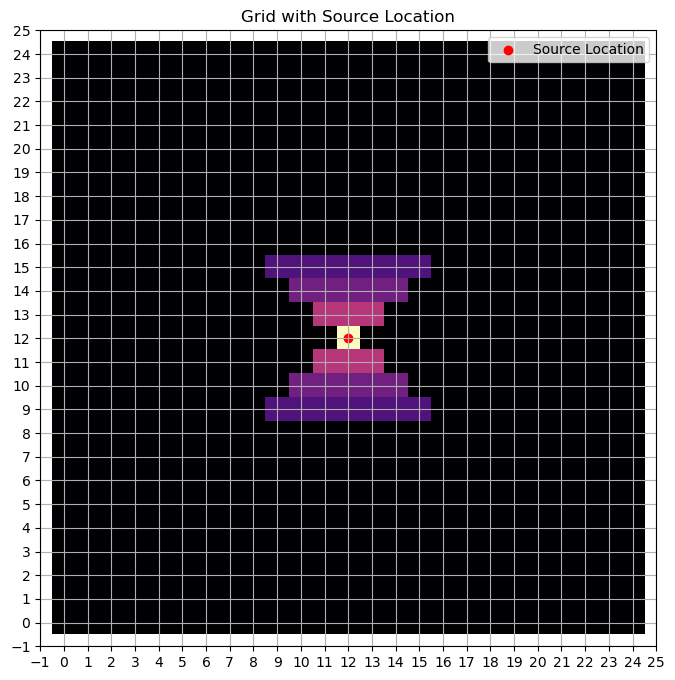

In [10]:
def location_function(sampled_locations, source_location):
    """
    Sample locations relative to the source, and return an array of probabilities of reading a signal.

    Args:
        sampled_locations (np.array of shape (n, 2)): x, y coordinates of the sampled locations.
        source_location (np.array of shape (2,)): x, y coordinates of the source location.
    Returns:
        np.array: Array of probabilities of reading a signal at each sampled location.
    """
    # Compute the absolute differences between each sampled location and the source location.
    dx = np.abs(sampled_locations[:, 0] - source_location[0])
    dy = np.abs(sampled_locations[:, 1] - source_location[1])
    
    # Initialize an array of zeros for probabilities.
    probabilities = np.zeros(len(dx), dtype=float)

    # Apply conditions using boolean indexing
    mask = (dy == 3) & (dx < 4)
    probabilities[mask] = 1/4

    mask = (dy == 2) & (dx < 3)
    probabilities[mask] = 1/3

    mask = (dy == 1) & (dx < 2)
    probabilities[mask] = 1/2

    mask = (dy == 0) & (dx < 1)
    probabilities[mask] = 1

    return probabilities


def sample_by_location(samples, source_location):
    """
    Sample a location and return a boolean array indicating whether a signal is read.

    Args:
        samples (np.array of shape (n, 2)): x, y coordinates of the sampled locations.
        source_location (np.array of shape (2,)): x, y coordinates of the source location.
    Returns:
        np.array: Boolean array with True if a signal is detected at the corresponding location.
    """
    # Get the probability of reading a signal for each sample
    f = location_function(samples, source_location)
    random_number = np.random.rand(len(samples))
    return random_number < f


# Setup the 25x25 grid
grid_size = 25
x = np.arange(grid_size)
y = np.arange(grid_size)
X, Y = np.meshgrid(x, y)

# Flatten the grid to obtain a list of (x, y) coordinate pairs.
locations = np.column_stack((X.ravel(), Y.ravel()))

# Define the source location
source_location = np.array([12, 12])

# Visualize the grid based on the probability intensity derived from location_function
Z = location_function(locations, source_location)
Z = Z.reshape(X.shape)

plt.figure(figsize=(8, 8))
plt.imshow(Z, extent=(-0.5, grid_size - 0.5, -0.5, grid_size - 0.5), origin='lower', cmap='magma')
plt.scatter(source_location[0], source_location[1], marker='o', color='red', label='Source Location')

plt.xlim(-1, grid_size)
plt.ylim(-1, grid_size)
plt.xticks(np.arange(-1, grid_size + 1, 1))
plt.yticks(np.arange(-1, grid_size + 1, 1))
plt.grid()
plt.title('Grid with Source Location')
plt.legend()
plt.show()